In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)

import pandas as pd
import numpy as np
import tflscripts
from tflscripts import boxplot_by, scatter_plot_by, heatmap_by
import json
import pickle

configuration = tflscripts.read_configuration()
df = pd.read_pickle('results.p')

df = df.loc[df.type_of_transfer == 'No transfer']

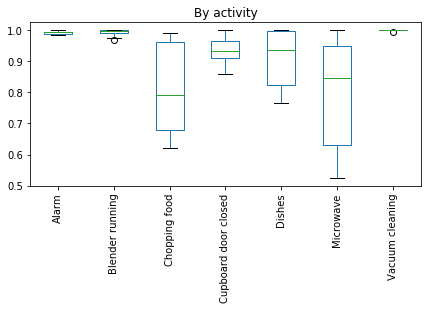

In [40]:
plt.rcParams["figure.figsize"] = (7, 3)

df_plot = df.loc[df.source_device_type == 'Mite']
df_plot = df_plot.loc[df.target_device_type == 'Mite']
df_plot = df_plot.loc[df.label.isin([
    'Alarm', 'Blender running', 'Vacuum cleaning',
    'Chopping food', 'Dishes', 'Microwave',  'Cupboard door closed'
])]

boxplot_by('label',
           value_column='f1',
           label=None,
           features='All',
           classifier='SVM',
           title='By activity',
           df_plot=df_plot)

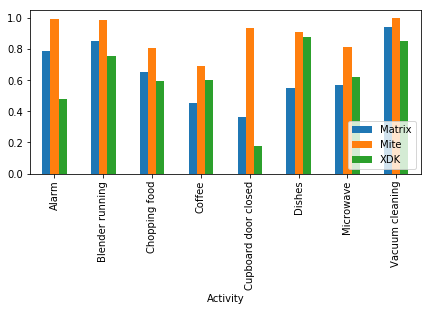

In [68]:
df_plot = df.loc[df.label.isin([
    'Alarm', 'Blender running', 'Vacuum cleaning', 'Coffee',
    'Chopping food', 'Dishes', 'Microwave',  'Cupboard door closed'
])]
df_plot = df_plot.loc[df_plot.classifier == 'SVM']
df_plot = df_plot.loc[df_plot.features_name == 'All']

df_plot = df_plot.groupby(['source_device_type', 'label'])['f1'].mean()
df_plot = df_plot.reset_index()
df_plot = df_plot.rename(columns={'source_device_type': 'Sensor type', 'label': 'Activity'})
df_plot = df_plot.pivot(index='Activity', columns='Sensor type', values='f1')
df_plot.plot.bar()
plt.legend(loc=4)